# in this notebook, we will create a binary classification model using pytorch and make prediciton using it

> reference learning [click here](https://www.learnpytorch.io/02_pytorch_classification/)

In [ ]:
#load the data set from scikit learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import make_circles

In [ ]:
#total sample size
n_samples = 1000

X , y = make_circles(n_samples, noise = 0.03 , random_state=42 )

len(X) , len(y) , X.shape , y.shape

(1000, 1000, (1000, 2), (1000,))

In [ ]:
#lets see some data:

print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [ ]:
#making dataframe
circles = pd.DataFrame({
    "X1" : X[ : , 0],
    "X2" : X[ : , 1],
    "label" : y
})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


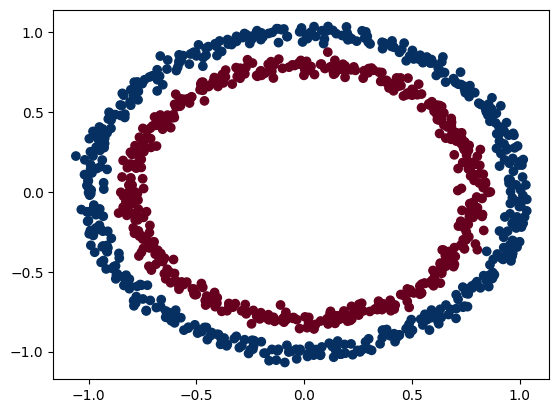

In [ ]:
#plot
plt.scatter(
        circles.X1.values ,
        circles.X2.values,
        cmap = plt.cm.RdBu_r,
        c = circles.label # it just selects 2 color as we have 2 labels: 0 and 1
      )

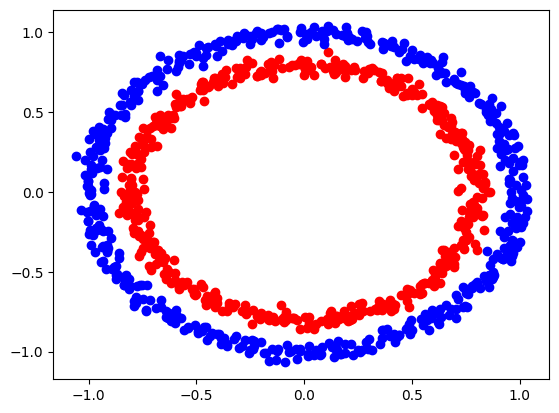

In [ ]:
#same as before

#plot
plt.scatter(
        circles.X1[circles.label == 1].values ,
        circles.X2[circles.label == 1].values,
        color = 'red'
      )

#plot
plt.scatter(
        circles.X1[circles.label == 0].values ,
        circles.X2[circles.label == 0].values,
        color = 'blue'

      )

In [ ]:
 import torch
 from torch import nn
 torch.__version__

'2.8.0+cu126'

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
 #turn our data into tensor
type(X) , X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
torch_X = torch.from_numpy(X).type(torch.float)


torch_y = torch.from_numpy(y).type(torch.float) #numpy got float64 || if we don't change , it will be float64 in tensor as well


type(torch_X), torch_X.dtype

(torch.Tensor, torch.float32)

In [ ]:
torch_X[:5] , torch_y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
#train and test split

from sklearn.model_selection import train_test_split

X_train ,X_test ,y_train, y_test = train_test_split(torch_X, torch_y , test_size = 0.2, random_state=42 )

X_train.shape, X_test.shape , y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [ ]:
#building model with one hidden layer

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(
          in_features = 2, # as our X has two val
          out_features = 5 # we will have 5 neurons in our hidden layer
    )

    self.layer2 = nn.Linear(
          in_features = 5,
          out_features = 1 # as our output is 1 val || either 0 or 1
    )

  def forward(self , x : torch.Tensor) -> torch.Tensor:
    x = self.layer1(x)
    x = self.layer2(x)
    return x



In [ ]:
#making model

torch.manual_seed(42)
model_0 = CircleModelV0()
model_0 , model_0.state_dict()

(CircleModelV0(
   (layer1): Linear(in_features=2, out_features=5, bias=True)
   (layer2): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('layer1.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188]])),
              ('layer1.bias',
               tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
              ('layer2.weight',
               tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
              ('layer2.bias', tensor([-0.2060]))]))

In [ ]:
#change model to gpu if available
model_0 = model_0.to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
#we can also also make model using nn.Sequential instead nn.Moduel eg:

torch.manual_seed(42)

model_sequential = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5 , out_features = 1)
)
model_sequential , model_sequential.state_dict()

(Sequential(
   (0): Linear(in_features=2, out_features=5, bias=True)
   (1): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('0.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188]])),
              ('0.bias', tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
              ('1.weight',
               tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
              ('1.bias', tensor([-0.2060]))]))

that looks much simpler than subclassing nn.Module, why not just always use nn.Sequential?

nn.Sequential is fantastic for straight-forward computations, however, as the namespace says, it always runs in sequential order.

So if you'd like something else to happen (rather than just straight-forward sequential computation) you'll want to define your own custom nn.Module subclass.

In [ ]:
#lets see the prediction of our newbie model and prediction shape:
untrained_pred = model_0(X_test.to(device))
print('shape or prediction: ' , untrained_pred.shape , '\n\n')
print('Some val of prediction: \n' , untrained_pred[:5], '\n\n')
print('Our actual output shape: ' , y_test.shape, '\n\n')
print('Val: ' , y_test[:5], '\n\n')

shape or prediction:  torch.Size([200, 1]) 


Some val of prediction: 
 tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='cuda:0', grad_fn=<SliceBackward0>) 


Our actual output shape:  torch.Size([200]) 


Val:  tensor([1., 0., 1., 0., 1.]) 




In [ ]:
#loss function and optimizer
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [ ]:

# #lets' create an accuracy function. its  opposite of accuray functin. we just want to see how the model accuracy increases along with cost decreases while training



In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
#understanding torch.eq and why used .item

a = torch.tensor([1,2,3])
b = torch.tensor([1,2,0])

correct = torch.eq(a,b).sum()
print(correct)        # tensor(2)
print(type(correct))  # <class 'torch.Tensor'>


tensor(2)
<class 'torch.Tensor'>


So correct is still a tensor object, not a plain Python number.

.item() converts a single-value tensor into a plain Python number (like int or float).

>Works only on tensors with exactly one element (0-dim tensors).

>Extracts the value and returns it as a native Python number (int, float, etc.), depending on the tensor’s dtype.

In [ ]:
correct = correct.item()
print(correct)        # 2
print(type(correct))  # <class 'int'>


2
<class 'int'>


$$
\mathbf{y} = x \cdot \mathbf{Weights}^T + \mathbf{bias}
$$



In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69721, Test acc: 50.00%
Epoch: 10 | Loss: 0.69403, Accuracy: 50.00% | Test loss: 0.69615, Test acc: 50.00%
Epoch: 20 | Loss: 0.69343, Accuracy: 46.00% | Test loss: 0.69585, Test acc: 48.50%
Epoch: 30 | Loss: 0.69321, Accuracy: 49.00% | Test loss: 0.69577, Test acc: 47.50%
Epoch: 40 | Loss: 0.69312, Accuracy: 49.50% | Test loss: 0.69573, Test acc: 46.50%
Epoch: 50 | Loss: 0.69308, Accuracy: 50.38% | Test loss: 0.69569, Test acc: 46.50%
Epoch: 60 | Loss: 0.69306, Accuracy: 50.50% | Test loss: 0.69564, Test acc: 46.50%
Epoch: 70 | Loss: 0.69305, Accuracy: 50.50% | Test loss: 0.69559, Test acc: 46.50%
Epoch: 80 | Loss: 0.69304, Accuracy: 50.75% | Test loss: 0.69553, Test acc: 46.50%
Epoch: 90 | Loss: 0.69303, Accuracy: 50.38% | Test loss: 0.69547, Test acc: 46.50%


bout logits -> [here](https://www.learnpytorch.io/02_pytorch_classification/#31-going-from-raw-model-outputs-to-predicted-labels-logits-prediction-probabilities-prediction-labels)

it looks like it went through the training and testing steps fine but the results don't seem to have moved too much.

The accuracy barely moves above 50% on each data split.

And because we're working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1 a model predicting class 1 every single time would achieve 50% accuracy).

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


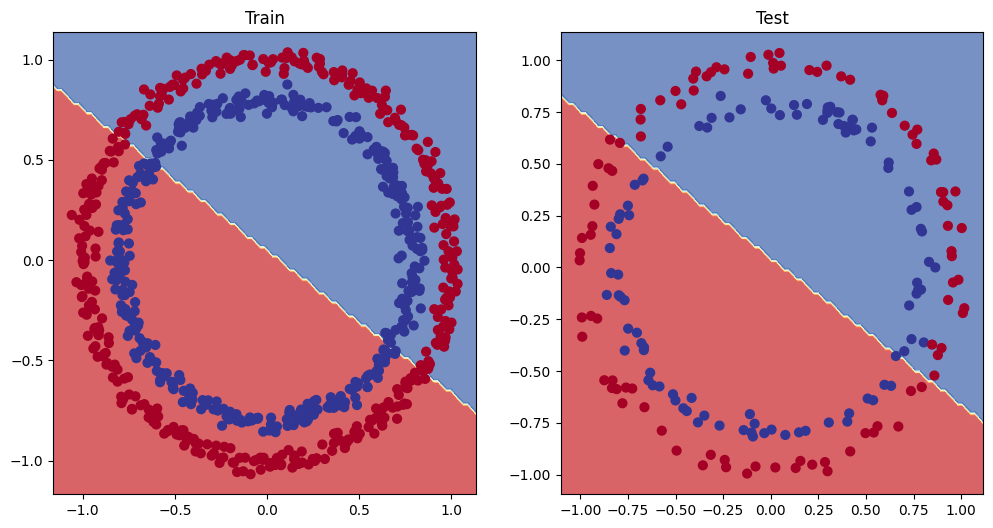

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [ ]:
# as our model acc is just 50%, it is just randomly guessing
#now we will try to increaese the neuron in hidden layer to see if it can do better

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(in_features = 2 , out_features = 10)
    self.layer2 = nn.Linear(in_features = 10 ,out_features = 10)
    self.layer3 = nn.Linear(in_features = 10 , out_features = 1)

  def forward(self , x):
    return self.layer3(self.layer2(self.layer1(x)))





In [ ]:
model_1 = CircleModelV1().to(device)
model_1.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, 

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model_1.train()

  y_logits = model_1(X_train).squeeze()

  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits , y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test ,test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


Model trained longer with extra layer. but still didn't learn anything : (

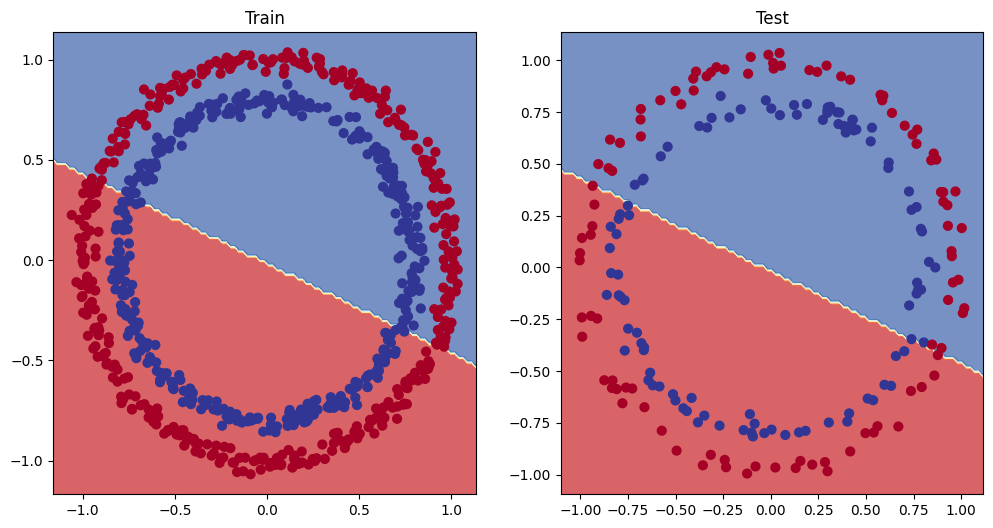

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1 , 2, 1)

plt.title('Train')

plot_decision_boundary(model_1 , X_train , y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1 , X_test , y_test)



Our model just guessing, not learning anything. we see it just creating a `straight line` between the data. Becasue it is `Linear`.

SO to predict well, we have to add `non linearity` to our model.
`Activation_function` creates `non linearity`. Some `activation function`s are : `ReLu` , `tanh`, `sigmoid` etc [see more](https://docs.pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)


In neural network, most used one is `ReLu`

In [ ]:
#now make new model using activation function: relu

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(in_features = 2 , out_features = 10)
    self.layer2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer3 = nn.Linear(in_features = 10 , out_features = 1)
    self.relu = nn.ReLU()

  def forward(self , x):
    x = self.relu(self.layer1(x))
    x = self.relu(self.layer2(x))
    x = self.layer3(x)
    return x

model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
next(model_2.parameters()).device


device(type='cuda', index=0)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss() #this handles sigmoid inbuilt
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.06)

In [ ]:
#loss and activation function are same. Now creating the traing loop

# Fit the model
torch.manual_seed(42)
epochs = 10000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels #torch.sigmoid can work on any

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits || this handles sigmoid inbuilt
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_2(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels #torch.sigmoid can work on any dim data
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f},Train Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295,Train Accuracy: 50.00% | Test Loss: 0.69321, Test Accuracy: 50.00%
Epoch: 1000 | Loss: 0.67513,Train Accuracy: 54.50% | Test Loss: 0.67286, Test Accuracy: 56.00%
Epoch: 2000 | Loss: 0.36976,Train Accuracy: 97.88% | Test Loss: 0.40566, Test Accuracy: 92.00%
Epoch: 3000 | Loss: 0.05769,Train Accuracy: 99.88% | Test Loss: 0.08673, Test Accuracy: 99.50%
Epoch: 4000 | Loss: 0.02604,Train Accuracy: 99.88% | Test Loss: 0.04663, Test Accuracy: 100.00%
Epoch: 5000 | Loss: 0.01672,Train Accuracy: 99.88% | Test Loss: 0.03363, Test Accuracy: 100.00%
Epoch: 6000 | Loss: 0.01231,Train Accuracy: 100.00% | Test Loss: 0.02750, Test Accuracy: 99.50%
Epoch: 7000 | Loss: 0.00976,Train Accuracy: 100.00% | Test Loss: 0.02332, Test Accuracy: 99.50%
Epoch: 8000 | Loss: 0.00809,Train Accuracy: 100.00% | Test Loss: 0.02053, Test Accuracy: 99.50%
Epoch: 9000 | Loss: 0.00690,Train Accuracy: 100.00% | Test Loss: 0.01866, Test Accuracy: 99.50%


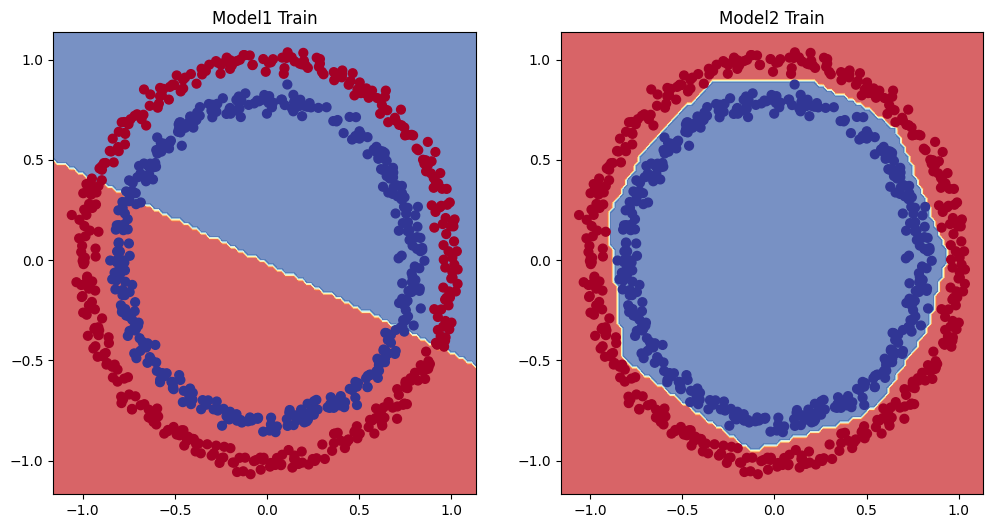

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Model1 Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Model2 Train")
plot_decision_boundary(model_2, X_train, y_train) # model_2 = has non-linearity

In [ ]:
## prediction accuracy
model_2.to(device)
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test.to(device)).squeeze()
  y_preds = torch.round(torch.sigmoid(y_preds)) #torch.sigmoid can work on any dim
  test_acc = accuracy_fn(y_preds.cpu() , y_test.cpu())

test_acc

99.5

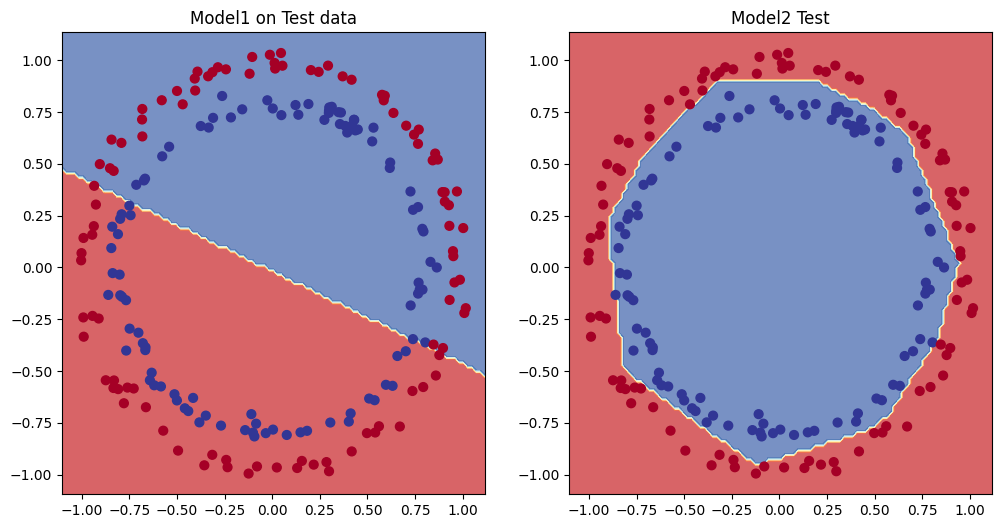

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Model1 on Test data")
plot_decision_boundary(model_1, X_test, y_test) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Model2 Test")
plot_decision_boundary(model_2, X_test, y_test) # model_2 = has non-linearity

### we can improve our model by hypertuning eg : chaning lr, increasing epochs, adding more layers , applying activation functin on random layers or all layers etc

# In the next note book , we will create multiclass classification - [multiclass classification](https://colab.research.google.com/drive/1VSDZr7BCtwavuAyWIfu2ywiHcNcVu_pj#scrollTo=FmmE6OuBylGv)